<h1>Assignment 10</h1>
<h3>STEP 517</h3>
<h4>POWER BI TO PYTHON CONVERSION </h4>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
house = pd.read_csv('house.csv')

In [4]:
house

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<h2>Location using GEOSPATIAL using folium </h2>

In [10]:
import folium

# Create a base map centered around the average latitude and longitude
center_lat = house['latitude'].mean()
center_lon = house['longitude'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=8)

# Add markers for houses near the ocean
for idx, row in house[house['ocean_proximity'] == 'NEAR OCEAN'].iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"Median House Value: ${row['median_house_value']}"
    ).add_to(m)

# Save the map to an HTML file
m.save("houses_near_ocean_map.html")
print("Map saved as 'houses_near_ocean_map.html'")
m

Map saved as 'houses_near_ocean_map.html'


<h2>Location using GEOSPATIAL using PANDAS </h2>

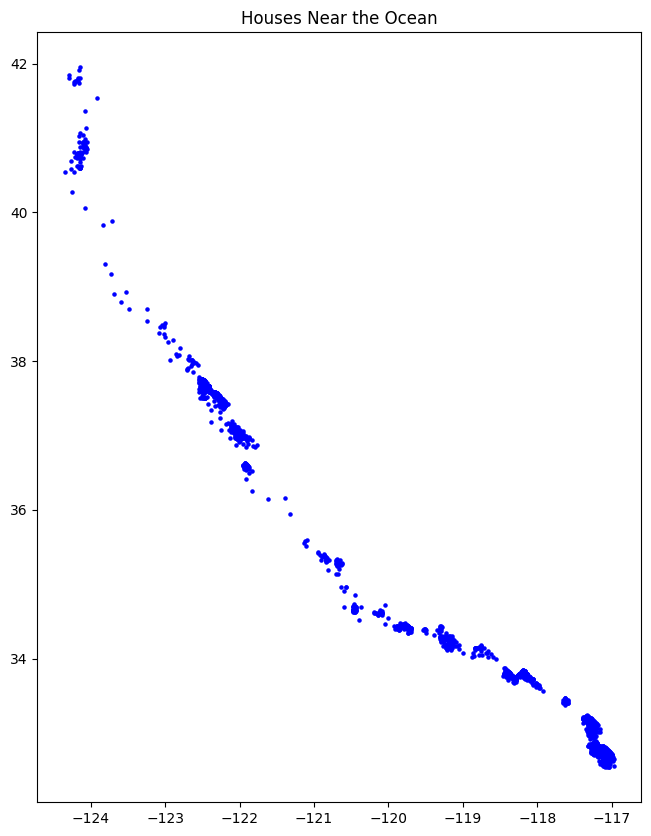

In [16]:
import geopandas as gpd
from shapely.geometry import Point

# Convert the DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(house['longitude'], house['latitude'])]
gdf = gpd.GeoDataFrame(house, geometry=geometry)

# Define a boundary for "near ocean" (example: within 0.1 degrees of the coast)
# This requires a shapefile or polygon defining the coastline
# For simplicity, we'll assume houses with "NEAR OCEAN" proximity are valid

near_ocean_gdf = gdf[gdf['ocean_proximity'] == 'NEAR OCEAN']

# Plot the GeoDataFrame
ax = near_ocean_gdf.plot(figsize=(10, 10), color='blue', markersize=5)
ax.set_title("Houses Near the Ocean")
plt.show()

<h2>Location near ocean </h2>

In [8]:
# Count houses near the ocean
near_ocean_count = house[house['ocean_proximity'] == 'NEAR OCEAN'].shape[0]
print(f"Number of houses near the ocean: {near_ocean_count}")

Number of houses near the ocean: 2658


<h3>Total Bedroom and Total rooms </h3>

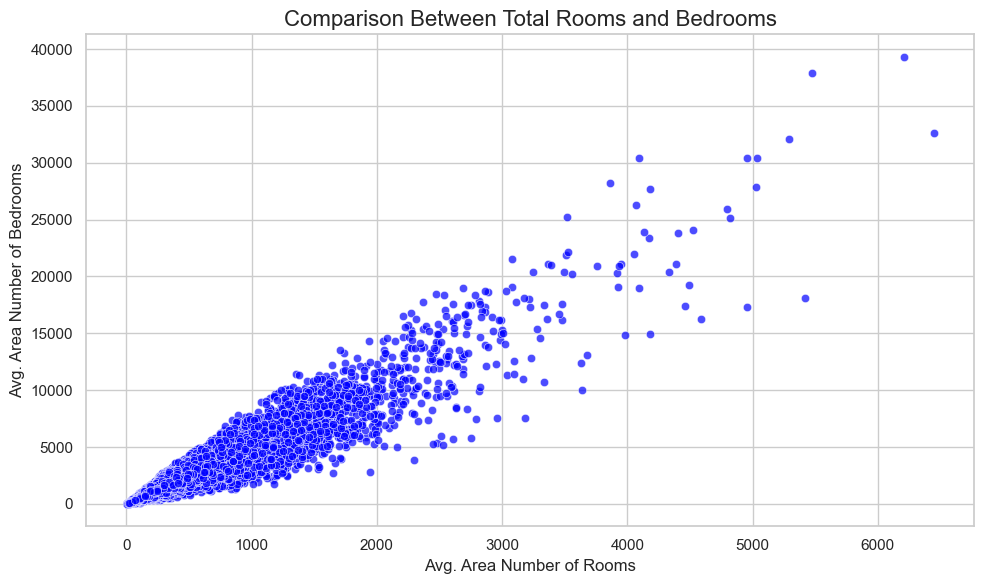

In [19]:
# import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="total_bedrooms",
    y="total_rooms",
    data=house,
    color="blue",
    alpha=0.7
)

# Add titles and labels
plt.title("Comparison Between Total Rooms and Bedrooms", fontsize=16)
plt.xlabel("Avg. Area Number of Rooms", fontsize=12)
plt.ylabel("Avg. Area Number of Bedrooms", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
house

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

<h3> Population and Households </h3>

In [20]:
# Sort the data by population
df_sorted = house.sort_values(by="population")

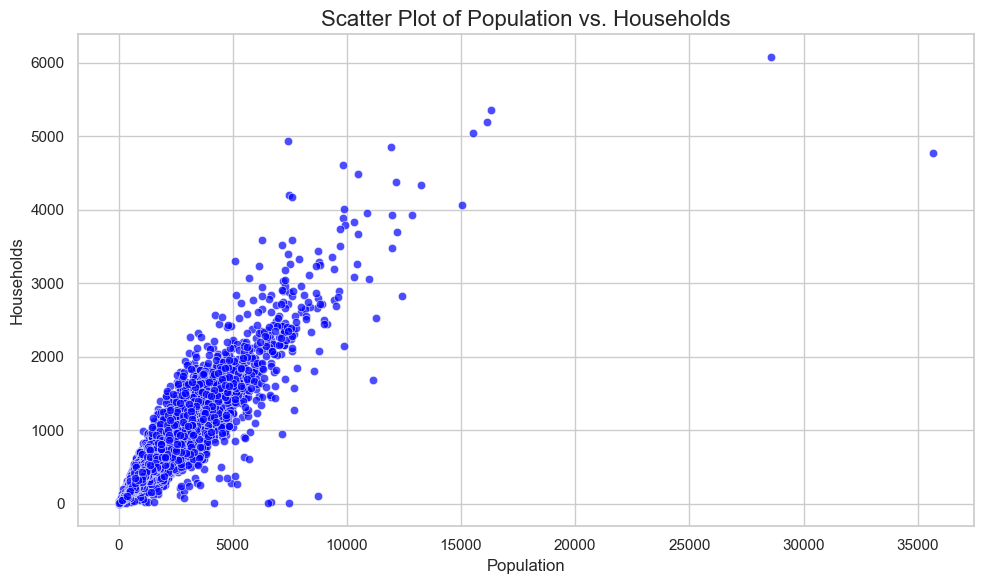

In [23]:
# import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="population",
    y="households",
    data=house,
    color="blue",
    alpha=0.7
)

# Add titles and labels
plt.title("Scatter Plot of Population vs. Households", fontsize=16)
plt.xlabel("Population", fontsize=12)
plt.ylabel("Households", fontsize=12)

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()